In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data=pd.read_excel("Train_dataset.xlsx",sheet_name='Train_dataset')

In [4]:
data.head()

people_ID        Region  Gender Designation             Name Married  \
0          1  Bhubaneshwar  Female         Mrs            mansi     YES   
1          2  Bhubaneshwar  Female         Mrs        riya masi     YES   
2          3  Bhubaneshwar  Female         Mrs           sunita      NO   
3          4  Bhubaneshwar  Female         Mrs   anjali @ babli     YES   
4          5  Bhubaneshwar  Female         Mrs  champa karketta      NO   

   Children     Occupation Mode_transport  cases/1M  ...    HBB d-dimer  \
0       1.0         Farmer         Public         2  ...   93.0   233.0   
1       2.0         Farmer           Walk         2  ...   56.0   328.0   
2       1.0        Cleaner         Public         2  ...  137.0   213.0   
3       1.0         Driver            Car         2  ...  167.0   275.0   
4       2.0  Manufacturing            Car         2  ...  153.0   331.0   

   Heart rate  HDL cholesterol Charlson Index Blood Glucose  Insurance  \
0        82.0             58.0             27             7  3600000.0   
1        89.0             68.0              5             6  1600000.0   
2        77.0             43.0             40             6  3400000.0   
3        64.0             60.0             27             7   700000.0   
4        71.0             64.0             32             7  3200000.0   

    salary  FT/month  Infect_Prob  
0  1300000       2.0    49.135010  
1   400000       1.0    51.147880  
2   900000       1.0    73.224000  
3  2300000       1.0    48.779225  
4  1100000       1.0    87.868800  

[5 rows x 28 columns]

In [5]:
data.head(1).T

0
people_ID                          1
Region                  Bhubaneshwar
Gender                        Female
Designation                      Mrs
Name                           mansi
Married                          YES
Children                           1
Occupation                    Farmer
Mode_transport                Public
cases/1M                           2
Deaths/1M                          0
comorbidity             Hypertension
Age                               68
Coma score                         8
Pulmonary score                 <400
cardiological pressure        Normal
Diuresis                         441
Platelets                        154
HBB                               93
d-dimer                          233
Heart rate                        82
HDL cholesterol                   58
Charlson Index                    27
Blood Glucose                      7
Insurance                    3.6e+06
salary                       1300000
FT/month                           2
Infect_Prob                   49.135

In [6]:
data.shape

(10714, 28)

In [7]:
"coloumns"
#data.columns
data.keys()

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

In [8]:
data.dtypes

people_ID                   int64
Region                     object
Gender                     object
Designation                object
Name                       object
Married                    object
Children                  float64
Occupation                 object
Mode_transport             object
cases/1M                    int64
Deaths/1M                   int64
comorbidity                object
Age                         int64
Coma score                  int64
Pulmonary score            object
cardiological pressure     object
Diuresis                  float64
Platelets                 float64
HBB                       float64
d-dimer                   float64
Heart rate                float64
HDL cholesterol           float64
Charlson Index              int64
Blood Glucose               int64
Insurance                 float64
salary                      int64
FT/month                  float64
Infect_Prob               float64
dtype: object

In [9]:
data.info() # for finding each coloumn data type and number of valid values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 

In [10]:
"""null values in each coloumn"""
data.isnull().sum().sort_values(ascending=False)

Heart rate                1114
d-dimer                   1114
Insurance                 1090
Platelets                  924
Occupation                 747
FT/month                   723
Diuresis                   716
Children                   311
comorbidity                226
cardiological pressure      97
HDL cholesterol             35
Name                        20
HBB                         16
Mode_transport               3
Designation                  0
Married                      0
Gender                       0
Region                       0
Infect_Prob                  0
Coma score                   0
cases/1M                     0
Deaths/1M                    0
Age                          0
Pulmonary score              0
Charlson Index               0
Blood Glucose                0
salary                       0
people_ID                    0
dtype: int64

In [11]:
data.describe()

people_ID      Children      cases/1M     Deaths/1M           Age  \
count  10714.000000  10403.000000  10714.000000  10714.000000  10714.000000   
mean   10084.893784      1.062770      3.285888      0.523241     42.083722   
std     7108.663645      0.818222      2.721274      0.854303     15.323397   
min        1.000000      0.000000      1.000000      0.000000     16.000000   
25%     2679.250000      0.000000      2.000000      0.000000     29.000000   
50%    10003.500000      1.000000      2.000000      0.000000     42.000000   
75%    15141.750000      2.000000      4.000000      1.000000     55.000000   
max    22695.000000      2.000000      8.000000      2.000000     68.000000   

         Coma score     Diuresis    Platelets           HBB      d-dimer  \
count  10714.000000  9998.000000  9790.000000  10698.000000  9600.000000   
mean       9.013067   278.806261    87.795812    116.170967   275.292292   
std        3.714970    97.985526    41.851103     55.178811    43.669692   
min        3.000000   110.000000    15.000000     20.000000   200.000000   
25%        6.000000   194.000000    52.000000     68.000000   237.000000   
50%        9.000000   276.000000    88.000000    117.000000   276.000000   
75%       12.000000   364.000000   124.000000    165.000000   313.000000   
max       15.000000   450.000000   160.000000    210.000000   350.000000   

        Heart rate  HDL cholesterol  Charlson Index  Blood Glucose  \
count  9600.000000     10679.000000    10714.000000   10714.000000   
mean     74.847396        52.632737       20.028094       5.015027   
std      14.869104        10.434293       11.828445       1.399770   
min      50.000000        35.000000        0.000000       3.000000   
25%      62.000000        44.000000       10.000000       4.000000   
50%      75.000000        53.000000       20.000000       5.000000   
75%      88.000000        62.000000       30.000000       6.000000   
max     100.000000        70.000000       40.000000       7.000000   

          Insurance        salary     FT/month   Infect_Prob  
count  9.624000e+03  1.071400e+04  9991.000000  10714.000000  
mean   2.644919e+06  1.304713e+06     1.004604     52.280680  
std    1.383346e+06  6.075947e+05     0.815257     10.674667  
min    3.000000e+05  3.000000e+05     0.000000     29.289600  
25%    1.400000e+06  8.000000e+05     0.000000     47.277426  
50%    2.600000e+06  1.300000e+06     1.000000     49.008389  
75%    3.800000e+06  1.800000e+06     2.000000     52.762313  
max    5.000000e+06  2.300000e+06     2.000000     97.632000

In [12]:
data=data.drop(['Designation','Name'],axis='columns')

In [13]:
data.columns

Index(['people_ID', 'Region', 'Gender', 'Married', 'Children', 'Occupation',
       'Mode_transport', 'cases/1M', 'Deaths/1M', 'comorbidity', 'Age',
       'Coma score', 'Pulmonary score', 'cardiological pressure', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month',
       'Infect_Prob'],
      dtype='object')

In [14]:
data.shape

(10714, 26)

In [15]:
# Select the object (string) columns
mask = data.dtypes == np.object
print(mask)
categorical_cols = data.columns[mask]
print(categorical_cols)

people_ID                 False
Region                     True
Gender                     True
Married                    True
Children                  False
Occupation                 True
Mode_transport             True
cases/1M                  False
Deaths/1M                 False
comorbidity                True
Age                       False
Coma score                False
Pulmonary score            True
cardiological pressure     True
Diuresis                  False
Platelets                 False
HBB                       False
d-dimer                   False
Heart rate                False
HDL cholesterol           False
Charlson Index            False
Blood Glucose             False
Insurance                 False
salary                    False
FT/month                  False
Infect_Prob               False
dtype: bool
Index(['Region', 'Gender', 'Married', 'Occupation', 'Mode_transport',
       'comorbidity', 'Pulmonary score', 'cardiological pressure'],
      dtype='objec

In [16]:
data[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=False)

Occupation                9
Region                    5
cardiological pressure    4
Pulmonary score           4
comorbidity               4
Mode_transport            3
Married                   2
Gender                    2
dtype: int64

In [17]:
numerical_cols=data.select_dtypes(include=['int64','float64']).columns
numerical_cols

Index(['people_ID', 'Children', 'cases/1M', 'Deaths/1M', 'Age', 'Coma score',
       'Diuresis', 'Platelets', 'HBB', 'd-dimer', 'Heart rate',
       'HDL cholesterol', 'Charlson Index', 'Blood Glucose', 'Insurance',
       'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

In [18]:
"number of unique values"
data.apply(lambda x: x.nunique()).sort_values(ascending=False)

people_ID                 10714
Infect_Prob                8724
Diuresis                    341
HBB                         191
d-dimer                     151
Platelets                   146
Age                          53
Heart rate                   51
Insurance                    48
Charlson Index               41
HDL cholesterol              36
salary                       21
Coma score                   13
Occupation                    9
Blood Glucose                 5
Region                        5
cardiological pressure        4
comorbidity                   4
cases/1M                      4
Pulmonary score               4
FT/month                      3
Deaths/1M                     3
Mode_transport                3
Children                      3
Married                       2
Gender                        2
dtype: int64

In [19]:
"considering non null values of categorical coloumns"
for i in categorical_cols:
    data=data[data[i].notna()]

In [20]:
data[categorical_cols].isnull().sum().sort_values(ascending=False)

cardiological pressure    0
Pulmonary score           0
comorbidity               0
Mode_transport            0
Occupation                0
Married                   0
Gender                    0
Region                    0
dtype: int64

In [21]:
data[numerical_cols]

people_ID  Children  cases/1M  Deaths/1M  Age  Coma score  Diuresis  \
0              1       1.0         2          0   68           8     441.0   
1              2       2.0         2          0   64          15       NaN   
2              3       1.0         2          0   19          13     416.0   
3              4       1.0         2          0   33           9     410.0   
4              5       2.0         2          0   23           7     390.0   
...          ...       ...       ...        ...  ...         ...       ...   
10709      22691       2.0         8          2   20          14     134.0   
10710      22692       0.0         8          2   42           4     387.0   
10711      22693       0.0         8          2   59           3     177.0   
10712      22694       1.0         8          2   49           6     352.0   
10713      22695       2.0         8          2   17           7     181.0   

       Platelets    HBB  d-dimer  Heart rate  HDL cholesterol  Charlson Index  \
0          154.0   93.0    233.0        82.0             58.0              27   
1          121.0   56.0    328.0        89.0             68.0               5   
2          124.0  137.0    213.0        77.0             43.0              40   
3           98.0  167.0    275.0        64.0             60.0              27   
4           21.0  153.0    331.0        71.0             64.0              32   
...          ...    ...      ...         ...              ...             ...   
10709       67.0   24.0    209.0        61.0             56.0              35   
10710      102.0  134.0    211.0        65.0             47.0              35   
10711      111.0  151.0    296.0        87.0             37.0              16   
10712      140.0  110.0    253.0        56.0             70.0              28   
10713       65.0  134.0    201.0        82.0             60.0               4   

       Blood Glucose  Insurance   salary  FT/month  Infect_Prob  
0                  7  3600000.0  1300000       2.0    49.135010  
1                  6  1600000.0   400000       1.0    51.147880  
2                  6  3400000.0   900000       1.0    73.224000  
3                  7   700000.0  2300000       1.0    48.779225  
4                  7  3200000.0  1100000       1.0    87.868800  
...              ...        ...      ...       ...          ...  
10709              7  4000000.0   300000       0.0    41.981760  
10710              7  1500000.0   700000       NaN    47.148663  
10711              5  3000000.0  2100000       2.0    47.708533  
10712              5  2900000.0   700000       1.0    53.803565  
10713              3  2100000.0  1400000       0.0    68.342400  

[9665 rows x 18 columns]

In [22]:
"filling numeric null values by mean"
from sklearn import preprocessing
for i in numerical_cols:
    if i!='people_ID' and i!='Infect_Prob':
        data[i].fillna(data[i].mean(),inplace=True)
        

In [23]:
"""null values in each coloumn"""
data.isnull().sum().sort_values(ascending=False)

Infect_Prob               0
FT/month                  0
Region                    0
Gender                    0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
Insurance                 0
salary                    0
people_ID                 0
dtype: int64

In [24]:
data.info() # for finding each coloumn data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9665 entries, 0 to 10713
Data columns (total 26 columns):
people_ID                 9665 non-null int64
Region                    9665 non-null object
Gender                    9665 non-null object
Married                   9665 non-null object
Children                  9665 non-null float64
Occupation                9665 non-null object
Mode_transport            9665 non-null object
cases/1M                  9665 non-null int64
Deaths/1M                 9665 non-null int64
comorbidity               9665 non-null object
Age                       9665 non-null int64
Coma score                9665 non-null int64
Pulmonary score           9665 non-null object
cardiological pressure    9665 non-null object
Diuresis                  9665 non-null float64
Platelets                 9665 non-null float64
HBB                       9665 non-null float64
d-dimer                   9665 non-null float64
Heart rate                9665 non-null float6

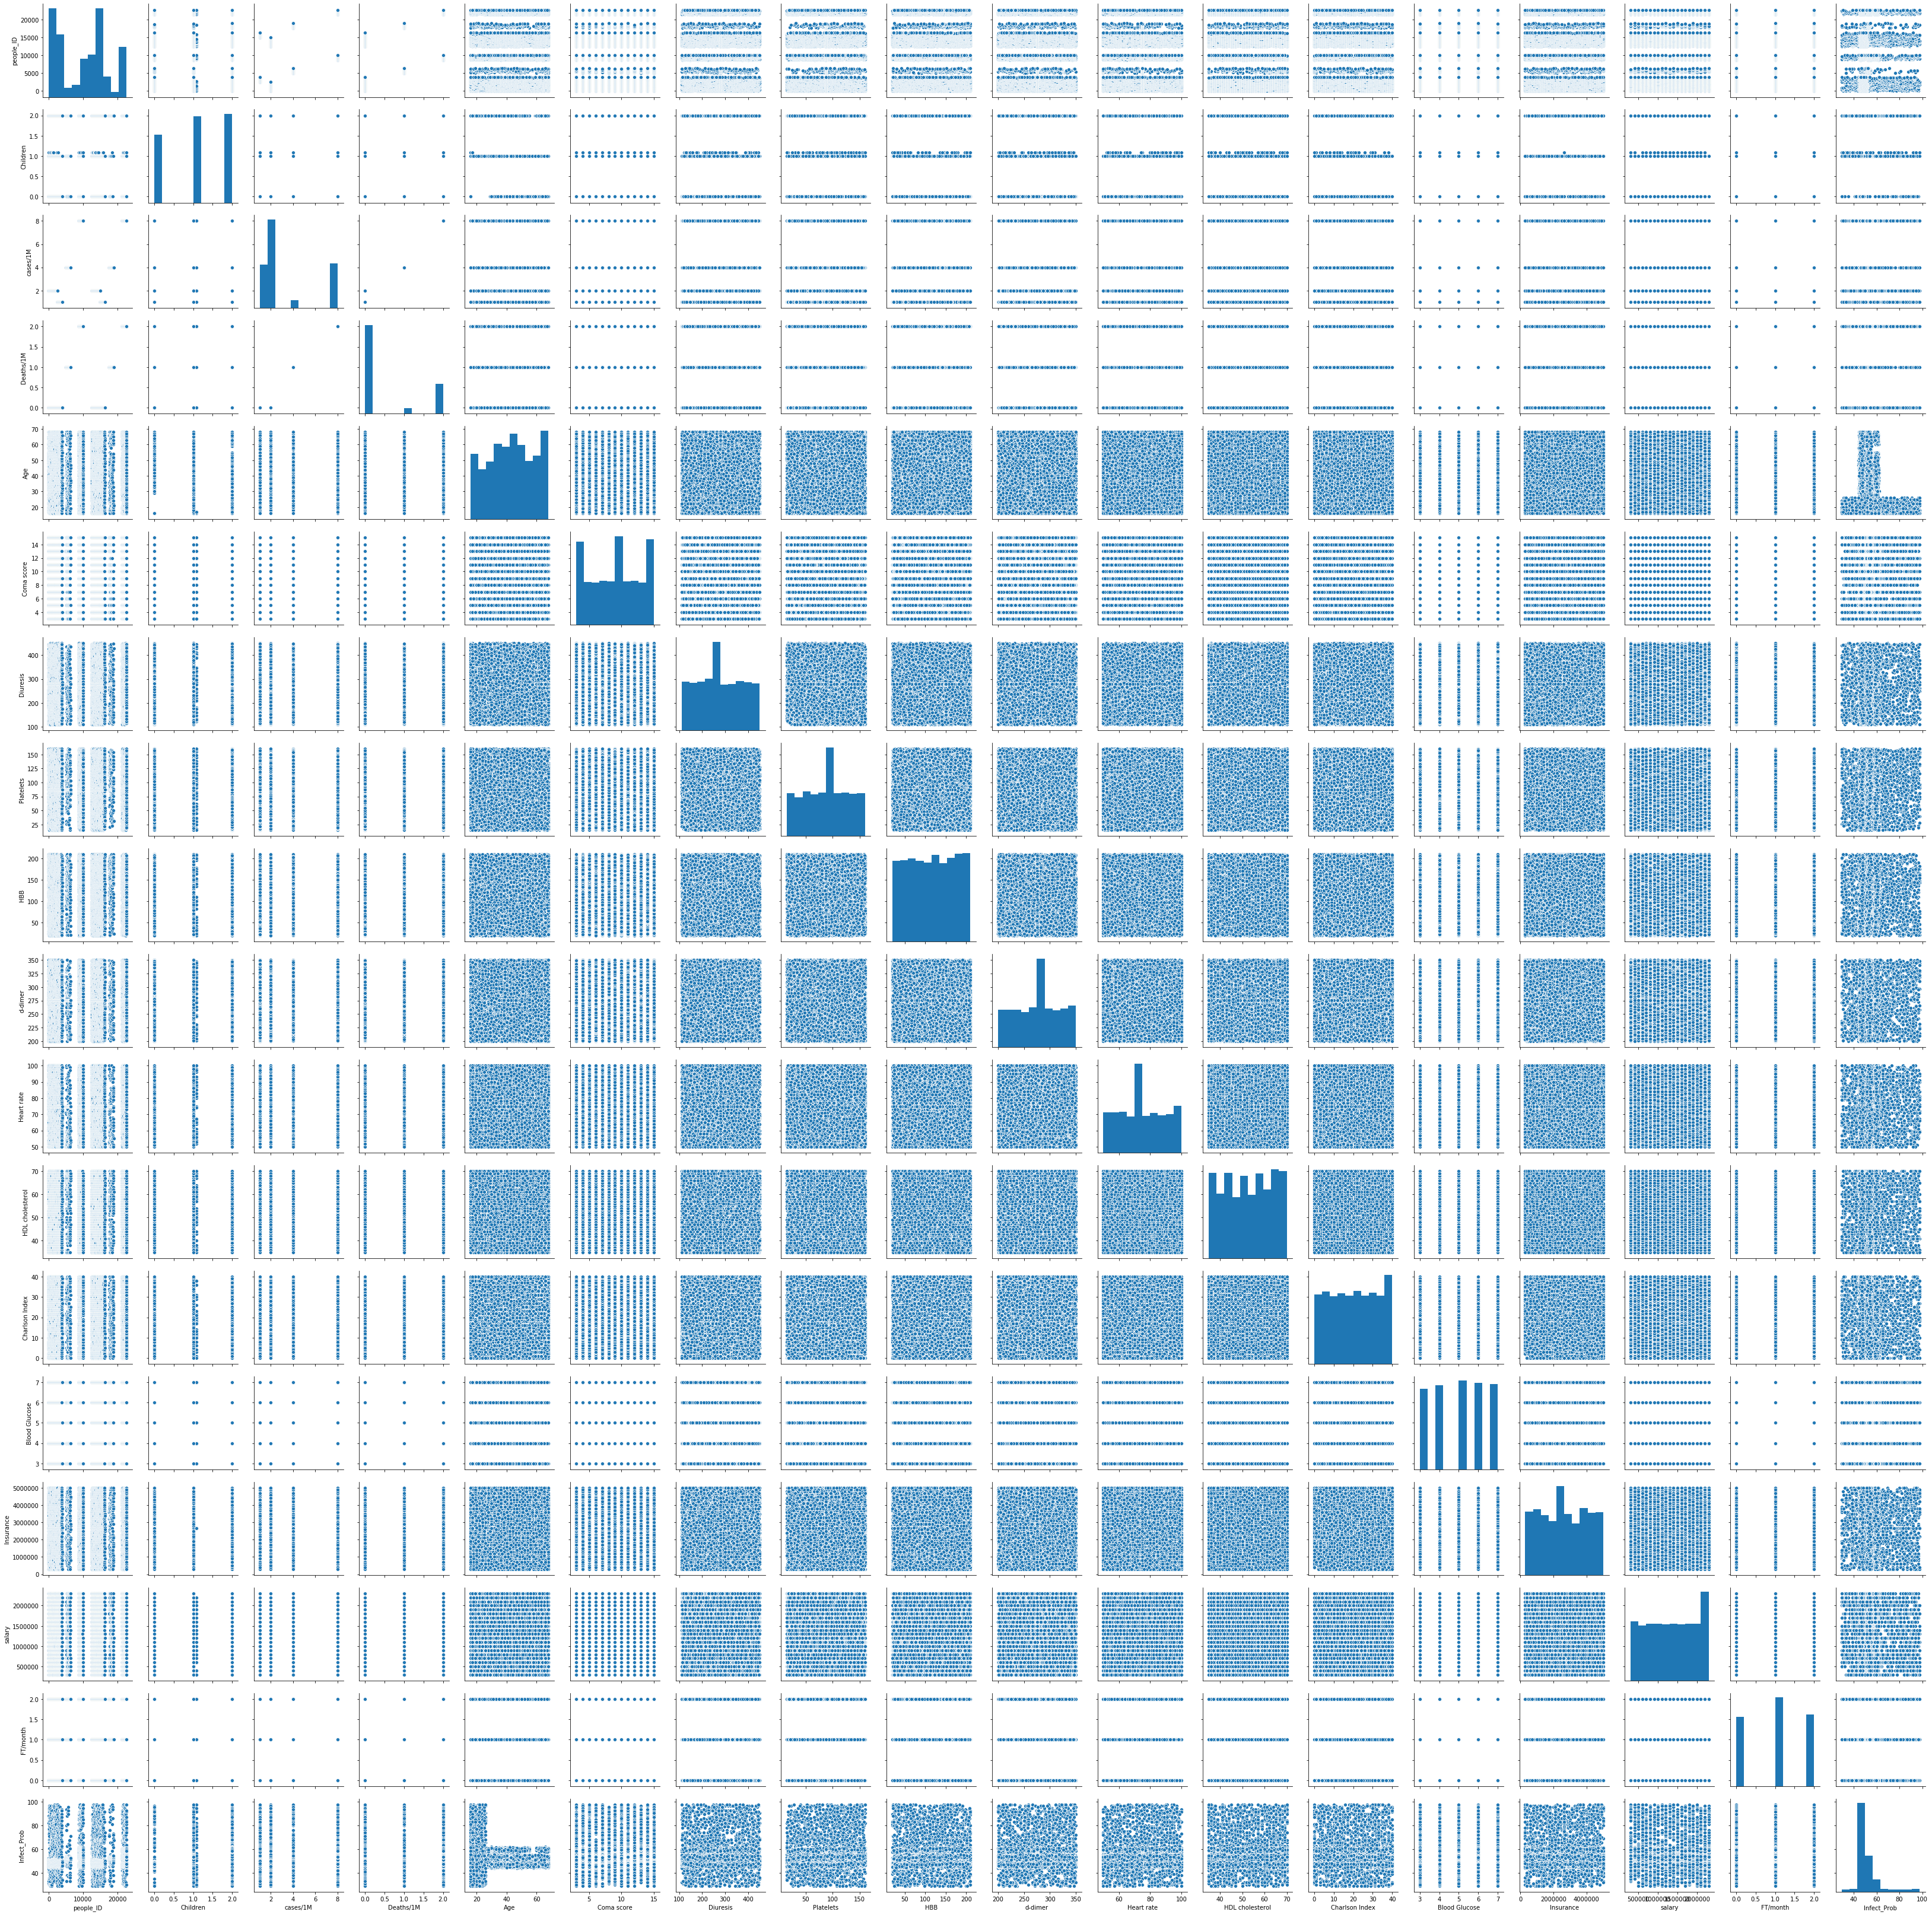

In [25]:
"pair plot"
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print(sns.pairplot(data))

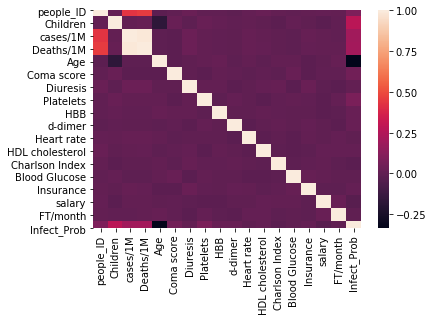

In [26]:
"heat map"
sns.heatmap(data.corr())

In [27]:
"conversion of categorical data into numeric data"
for i in categorical_cols:
    data[i] = data[i].astype('category').cat.codes

In [28]:
data.info() # for finding each coloumn data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9665 entries, 0 to 10713
Data columns (total 26 columns):
people_ID                 9665 non-null int64
Region                    9665 non-null int8
Gender                    9665 non-null int8
Married                   9665 non-null int8
Children                  9665 non-null float64
Occupation                9665 non-null int8
Mode_transport            9665 non-null int8
cases/1M                  9665 non-null int64
Deaths/1M                 9665 non-null int64
comorbidity               9665 non-null int8
Age                       9665 non-null int64
Coma score                9665 non-null int64
Pulmonary score           9665 non-null int8
cardiological pressure    9665 non-null int8
Diuresis                  9665 non-null float64
Platelets                 9665 non-null float64
HBB                       9665 non-null float64
d-dimer                   9665 non-null float64
Heart rate                9665 non-null float64
HDL cholestero

In [29]:
#removing target Coloumn
X_data = data.copy()
y_data = X_data.pop('Infect_Prob')

In [30]:
print(X_data.shape)
print(y_data.shape)

(9665, 25)
(9665,)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size=0.2, random_state=42,shuffle=True)

In [32]:
print(X_train .shape, X_test.shape, y_train.shape, y_test.shape)

(7732, 25) (1933, 25) (7732,) (1933,)


In [33]:
"using Leanier"
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

In [34]:
print(X_test.shape,pred.shape)

(1933, 25) (1933,)


In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

train_pred=lr.predict(X_train)
print('Training Error_MeanSquareError',mean_squared_error(y_train,train_pred))
print('Training Error_MeanAbsoluteError',mean_absolute_error(y_train,train_pred))
print('Training Error_R^2Error',r2_score(y_train,train_pred))
train_pred=lr.predict(X_test)
print('Testing error_MeanSquareError', mean_squared_error(y_test,train_pred))
print('Testing Error_MeanAbsoluteError',mean_absolute_error(y_test,train_pred))
print('Testing Error_R^2Error',r2_score(y_test,train_pred))


Training Error_MeanSquareError 66.25691452146545
Training Error_MeanAbsoluteError 3.8634370577596444
Training Error_R^2Error 0.30498725474605803
Testing error_MeanSquareError 68.7837795304322
Testing Error_MeanAbsoluteError 3.9847484058253912
Testing Error_R^2Error 0.3411882181881283


In [36]:
""" using Ridge Regressor"""
from sklearn.linear_model import Ridge
ri=Ridge()
ri.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
train_pred=ri.predict(X_train)
print('Training Error_MeanSquareError',mean_squared_error(y_train,train_pred))
print('Training Error_MeanAbsoluteError',mean_absolute_error(y_train,train_pred))
print('Training Error_R^2Error',r2_score(y_train,train_pred))
train_pred=ri.predict(X_test)
print('Testing error_MeanSquareError', mean_squared_error(y_test,train_pred))
print('Testing Error_MeanAbsoluteError',mean_absolute_error(y_test,train_pred))
print('Testing Error_R^2Error',r2_score(y_test,train_pred))

Training Error_MeanSquareError 66.25712626051553
Training Error_MeanAbsoluteError 3.8618704067453944
Training Error_R^2Error 0.30498503367464924
Testing error_MeanSquareError 68.7942351371313
Testing Error_MeanAbsoluteError 3.983284352109262
Testing Error_R^2Error 0.34108807427445587


In [38]:
"SVM Regressor"
"""
# svm = svm.best_estimator
from sklearn.svm import SVR
svmr = SVR(kernel='linear')
#svmr= SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svmr.fit(X_train,y_train)
pred=svmr.predict(X_test)
print('RMSE is: \n', mean_squared_error(y_test, pred))
train_pred=svmr.predict(X_train)
print('Training Error_MeanSquareError',mean_squared_error(y_train,train_pred))
print('Training Error_MeanAbsoluteError',mean_absolute_error(y_train,train_pred))
print('Training Error_R^2Error',r2_score(y_train,train_pred))
train_pred=svmr.predict(X_test)
print('Testing error_MeanSquareError', mean_squared_error(y_test,train_pred))
print('Testing Error_MeanAbsoluteError',mean_absolute_error(y_test,train_pred))
print('Testing Error_R^2Error',r2_score(y_test,train_pred))
"""

"\n# svm = svm.best_estimator\nfrom sklearn.svm import SVR\nsvmr = SVR(kernel='linear')\n#svmr= SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)\nsvmr.fit(X_train,y_train)\npred=svmr.predict(X_test)\nprint('RMSE is: \n', mean_squared_error(y_test, pred))\ntrain_pred=svmr.predict(X_train)\nprint('Training Error_MeanSquareError',mean_squared_error(y_train,train_pred))\nprint('Training Error_MeanAbsoluteError',mean_absolute_error(y_train,train_pred))\nprint('Training Error_R^2Error',r2_score(y_train,train_pred))\ntrain_pred=svmr.predict(X_test)\nprint('Testing error_MeanSquareError', mean_squared_error(y_test,train_pred))\nprint('Testing Error_MeanAbsoluteError',mean_absolute_error(y_test,train_pred))\nprint('Testing Error_R^2Error',r2_score(y_test,train_pred))\n"

In [43]:
data_test=pd.read_excel("Test_dataset.xlsx",sheet_name='Test_dataset')

In [44]:
"converting categorical values into numerical values"
for i in categorical_cols:
    data_test[i]=data_test[i].astype('category').cat.codes

data_test=data_test.drop(['Name','Designation'],axis=1)

In [45]:
data_test.shape

(14498, 25)

In [46]:
test_id=data_test['people_ID']
#data_test=data_test.drop(["probabilty of getting covid"],axis=1)

In [47]:
data_test.shape

(14498, 25)

In [50]:
'''linear regressor'''
data_test['probabilty of getting covid']=lr.predict(data_test)

In [51]:
result=pd.DataFrame({'people_ID':test_id, 'Infect_prob':data_test['probabilty of getting covid']})
result.to_csv('output_part1_linear.csv', index=False)

In [48]:
'''rigid regressor'''
data_test['probabilty of getting covid']=ri.predict(data_test)

In [49]:
result=pd.DataFrame({'people_ID':test_id, 'Infect_prob':data_test['probabilty of getting covid']})
result.to_csv('output_part1.csv', index=False)